# AC 221: Critical Thinking in Data Science

## Problem Set 1, Part 2
**February 27, 2020**<br/>
**Harvard University**<br/>
**Spring 2020**<br/>

<hr style="height:2pt">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from azureml.opendatasets import UsPopulationZip

## 1. Distribution of Demographic Features in the United States

### Data Sources
#### US Census FactFinder
The distribution of age was calculating using US 2010 Decennial Census.

Annual Estimates of the Resident Population by Single Year of Age and Sex for the United States: April 1, 2010 to July 1, 2018
Source: U.S. Census Bureau, Population Division
Release Date: June 2019 
Link: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk

#### Microsoft Azure - Open Datasets
The distributions for zipcode, sex, and gender were calculated using Microsoft Azure's *US Population by Zipcode* Open Dataset, which in turn was sourced from the 2010 US Decennial Census. Because the census collects data only on sex and not gender, we used sex as a proxy for gender.

Link: https://azure.microsoft.com/en-us/services/open-datasets/catalog/us-decennial-census-zip/

### Age

In [3]:
age_df = pd.read_csv("data/census_age_0-100.csv")
age_2010 = age_df[['Age', '2010']][1:]

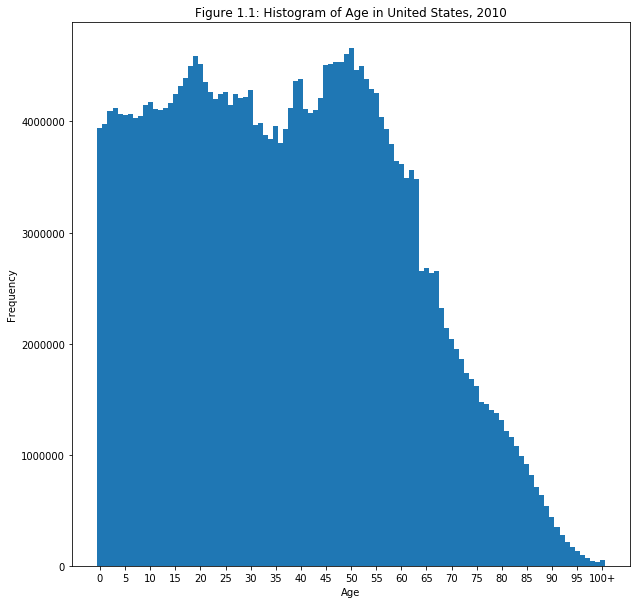

In [8]:
xticks = list(range(0, 100, 5))
xtick_labels = [str(x) for x in xticks]
xticks.append(100)
xtick_labels.append('100+')

plt.figure(figsize=(10,10))
plt.title("Figure 1.1: Histogram of Age in United States, 2010")
plt.bar(age_2010['Age'], age_2010['2010'], width = 1.0)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xticks(xticks, xtick_labels)
plt.show()

As seen in **Figure 1.1**, age is not uniformly distributed in the United States. Instead, it has a bimodal, right skewed distribution. 

### Zip Code

In [7]:
population_df = UsPopulationZip().to_pandas_dataframe()

Looking for parquet files...
Reading them into Pandas dataframe...
Reading release/us_population_zip/year=2010/part-00178-tid-5434563040420806442-84b5e4ab-8ab1-4e28-beb1-81caf32ca312-1919656.c000.snappy.parquet under container censusdatacontainer
Done.


In [10]:
# Remove rows with None's, which are aggregations of the more specific values.
pop = population_df.query('~(sex.isnull()) & (~race.isnull()) & ~(minAge.isna() | maxAge.isna())', engine='python')

Text(0.5, 0, 'Pop. Size')

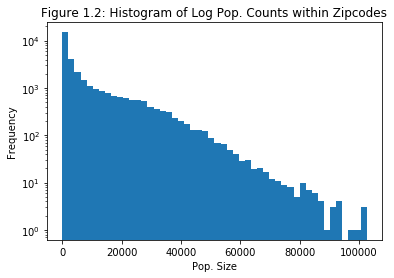

In [11]:
# Graph
ax = pop.groupby('zipCode')['population'].sum().plot.hist(bins=50, logy=True)
ax.set_title('Figure 1.2: Histogram of Log Pop. Counts within Zipcodes, 2010')
ax.set_xlabel('Pop. Size')

**Figure 1.2** shows that the population size within zipcodes is not uniformly distributed.

### Gender (By Proxy of Sex)

/home/pau/anaconda3/envs/ac221ps1/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  
/home/pau/anaconda3/envs/ac221ps1/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in long_scalars
  


Text(0.5, 1.0, 'Figure 1.3: Histogram of Female to Male Population Ratio by Zipcode, 2010')

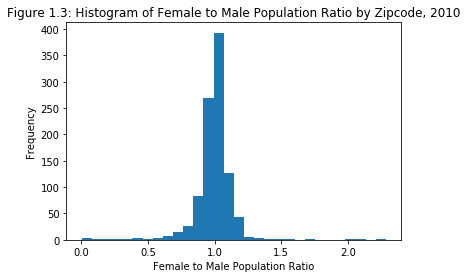

In [12]:
sex_ratios = pop.groupby(['zipCode']).apply((lambda g: g.query('sex == "Female"')['population'].sum()
                                       / g.query('sex == "Male"')['population'].sum()))
np.random.seed(1)
ax = sex_ratios.replace([np.inf, -np.inf], np.nan).dropna().sample(1000).plot.hist(bins=30)
ax.set_xlabel("Female to Male Population Ratio")
ax.set_title("Figure 1.3: Histogram of Female to Male Population Ratio by Zipcode, 2010")

Interpetation.

### Race

Text(0, 0.5, 'Proportion of Total Population (log scale)')

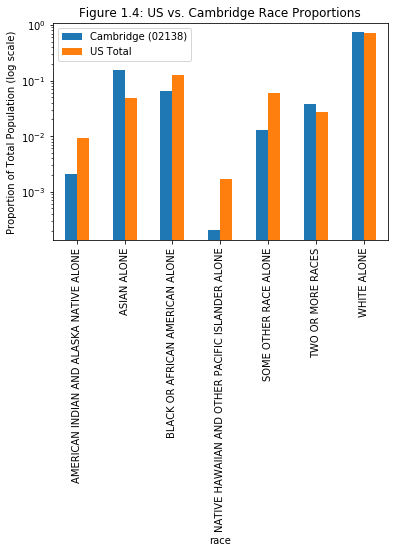

In [13]:
cambridge = pop.query('zipCode == "02138"')
ax = pd.DataFrame({
    'US Total': pop.groupby('race')['population'].sum() / 
                pop['population'].sum(),
    'Cambridge (02138)': cambridge.groupby('race')['population'].sum() / 
                         cambridge['population'].sum(),
}).plot.bar(logy=True)
ax.set_title('Figure 1.4: US vs. Cambridge Race Proportions')
ax.set_ylabel('Proportion of Total Population (log scale)')

Interpretation. 